In [3]:
#練習參考 https://ithelp.ithome.com.tw/articles/10205068
# import twstock
# basic
import numpy as np
import pandas as pd

# get data
import pandas_datareader as pdr

# visual
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#time
import datetime as datetime


In [2]:

stock_2330 = twstock.Stock('2330')

price_2330 = stock_2330.price[-5:]       
high_2330 = stock_2330.high[-5:]         
low_2330 = stock_2330.low[-5:]           
date_2330 = stock_2330.date[-5:]         

print('price_2330--->', price_2330)
print('high_2330--->', high_2330)
print('low_2330--->', low_2330)
print('date_2330--->', date_2330)

NameError: name 'twstock' is not defined

In [ ]:


stock_2330_2018=stock_2330.fetch(2019,1)
stock_2330_2018.pd=pd.Dataframe(stock_2330_2018)


fig = plt.figure(figsize=(10, 6))
plt.plot(stock_2330_2018_pd.close, '-' , label="收盤價")


In [ ]:
import pandas_datareader as pdr
df_2330 = pdr.DataReader('2330.TW', 'yahoo')
df_2330

Text(0.5, 1.0, '收盤價')

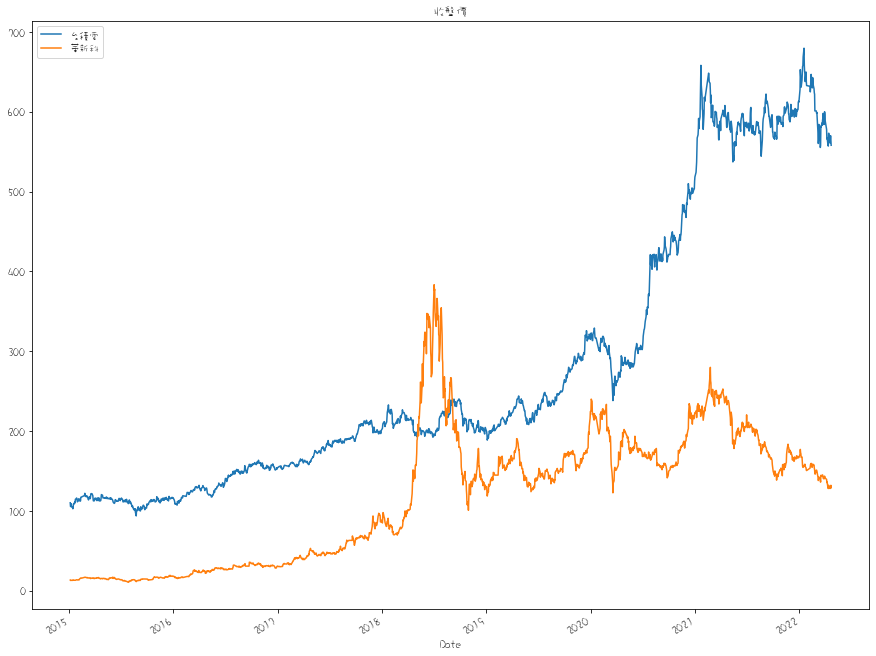

In [14]:
start = datetime.datetime(2015,1,1)
df_2330 = pdr.DataReader('2330.TW', 'yahoo', start=start)
df_2492 = pdr.DataReader('2492.TW', 'yahoo', start=start)

fig=plt.figure(figsize=(15, 12))
df_2330['Adj Close'].plot(label="台積電")
df_2492['Adj Close'].plot(label="華新科")
plt.legend()
plt.title("收盤價")

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-05,140.5,137.5,140.5,139.5,32046000.0,110.153931
2015-01-06,137.5,133.0,137.5,133.5,66778000.0,105.416100
2015-01-07,135.0,133.5,133.5,134.0,43703000.0,105.810944
2015-01-08,138.0,136.0,136.5,138.0,42491000.0,108.969467
2015-01-09,135.5,133.0,135.0,134.0,61558000.0,105.810944
...,...,...,...,...,...,...
2022-04-18,566.0,558.0,559.0,561.0,15800959.0,561.000000
2022-04-19,569.0,563.0,566.0,565.0,16614705.0,565.000000
2022-04-20,570.0,562.0,570.0,570.0,27606307.0,570.000000


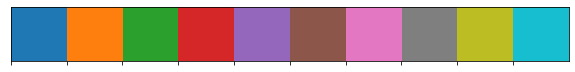

In [6]:
sns.palplot(sns.color_palette())
df_2330

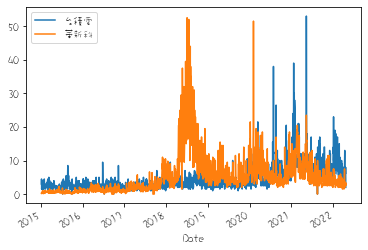

In [15]:
#台積電(2330)和華新科(2492)每天的波動

df_2330['High-Low'] = df_2330['High'] - df_2330['Low']
df_2492['High-Low'] = df_2492['High'] - df_2492['Low']

fig = plt.figure()
df_2330['High-Low'].plot(label="台積電")
df_2492['High-Low'].plot(label="華新科")
plt.legend()

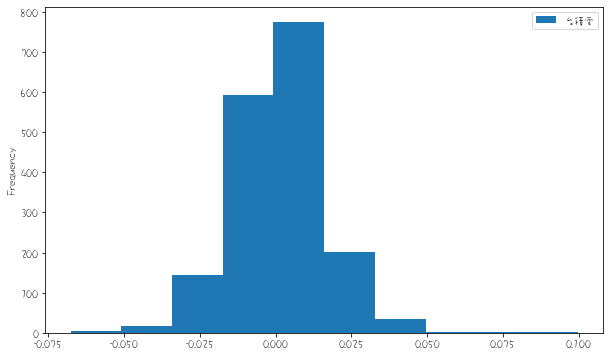

In [17]:
#plt.rcParams['axes.unicode_minus']=False
fig = plt.figure(figsize=(10, 6))
df_2330['daily-return'] = df_2330['Adj Close'].pct_change()
df_2330['daily-return'].plot(label="台積電", kind='hist')
plt.legend()

C:\Users\GBST0697\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


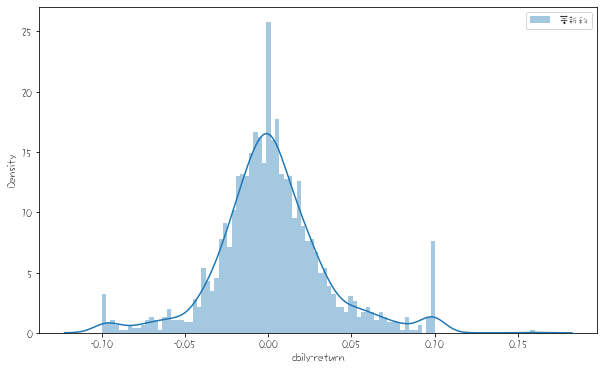

In [19]:
fig = plt.figure(figsize=(10, 6))
df_2492['daily-return'] = df_2492['Adj Close'].pct_change()
sns.distplot(df_2492['daily-return'].dropna(),bins=100, label="華新科")
plt.legend()
# pct_change() = (df_2492['Adj Close'][0] - df_2492['Adj Close'][1]) / df_2492['Adj Close'][1]

In [22]:
start = datetime.datetime(2015,1,5)
campany = ['2492.TW', '2330.TW', '3045.TW', '2412.TW', '2409.TW']
df_stock = pdr.DataReader(campany, 'yahoo', start=start)
df_stock
df_stock['Adj Close']['2330.TW']

Date
2015-01-05    110.153923
2015-01-06    105.416100
2015-01-07    105.810928
2015-01-08    108.969467
2015-01-09    105.810928
                 ...    
2022-04-20    570.000000
2022-04-21    565.000000
2022-04-22    558.000000
2022-04-25    547.000000
2022-04-26    547.000000
Name: 2330.TW, Length: 1779, dtype: float64

<AxesSubplot:xlabel='Date'>

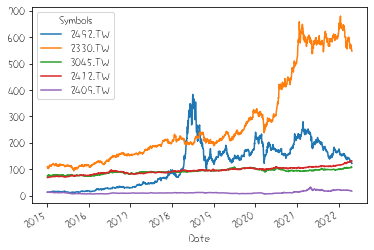

In [23]:
#比較股票之間關係
adjClose = df_stock['Adj Close']
adjClose.plot()

C:\Users\GBST0697\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


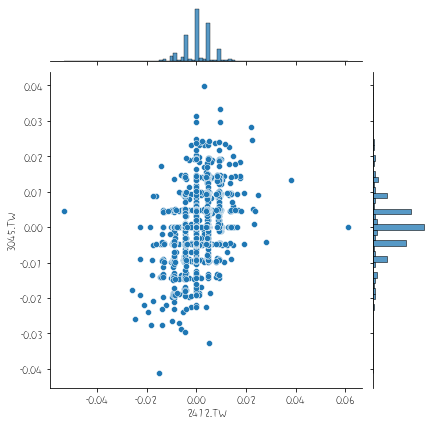

In [24]:
#比較收益率關係，使用scatter plot
plt.rcParams['axes.unicode_minus']=False
adjClose_pct = adjClose.pct_change()
sns.jointplot('2412.TW','3045.TW',adjClose_pct, kind="scatter")

In [28]:
#加上線性回歸線

sns.regplot('2412.TW','3045.TW',adjClose_pct)

UsageError: Line magic function `%%capture` not found.


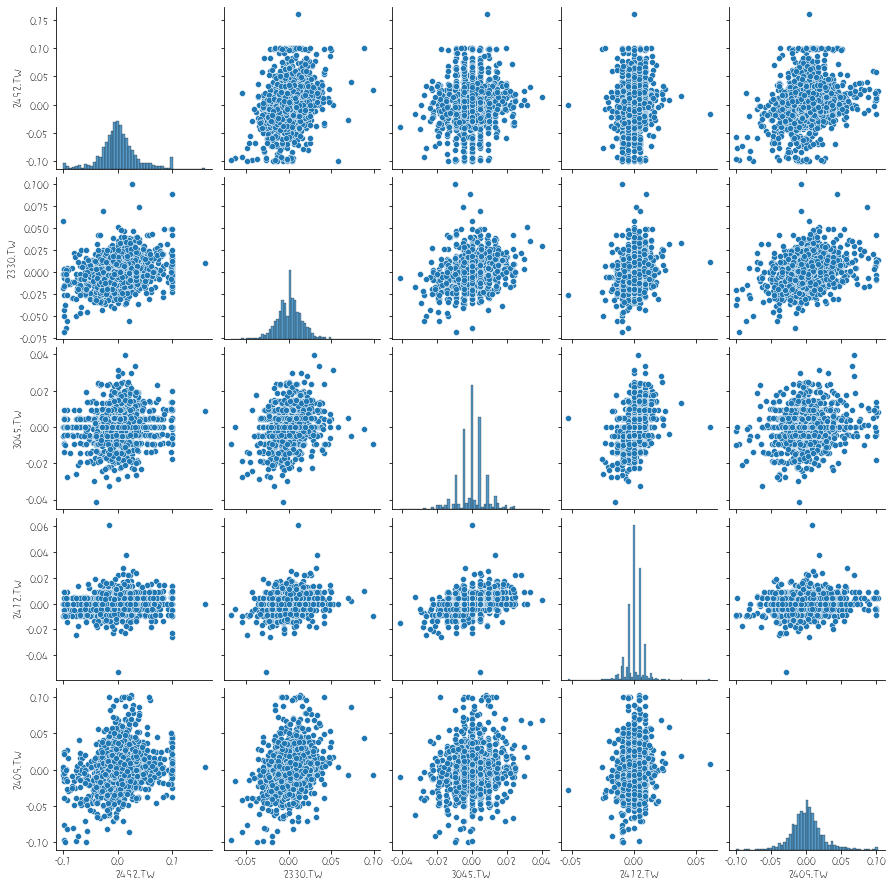

In [27]:
#同時比較多家公司
sns.pairplot(adjClose_pct.dropna())